In [2]:
# imports
import numpy as np
from urllib.request import Request, urlopen
from skimage import io
from skimage.color import *
import shutil
import os
import sys
from matplotlib import pyplot as plt
import json
import pandas as pd

In [2]:
# allow use of functions from project
sys.path.insert(0, 'C:\\Users\\Nicho\\Desktop\\MineSkins')
import etl as ETL

ModuleNotFoundError: No module named 'selenium'

In [13]:
from PIL import Image

In [20]:
# practice resizing
img = Image.open('../data/0.png')
new_img = img.resize((32, 32)).convert(mode='RGB')
new_img.save('./0.png')

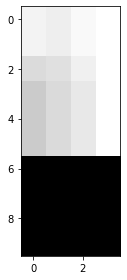

In [33]:
img_0 = io.imread('../data/0.png')
io.imshow(img_0[10:20,16,:])

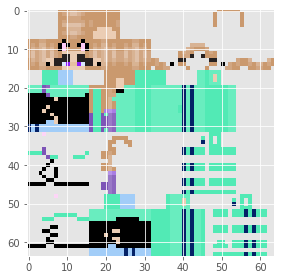

In [31]:
io.imshow(io.imread('../data/2150.png'))

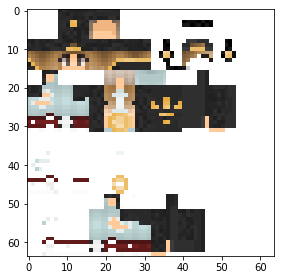

In [3]:
# read in sample skin
fname = '28.png'
skin = io.imread('../data/'+fname)
io.imshow(skin)

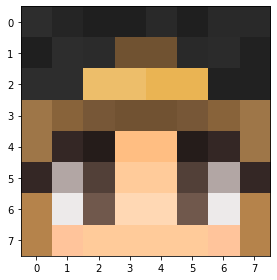

In [4]:
# grab face and torso
face = skin[8:16, 8:16, :]
torso = skin[20:32, 20:28, :]
display(io.imshow(face))

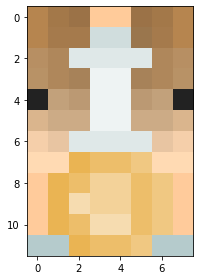

In [5]:
display(io.imshow(torso))

Text(0.5, 1.0, 'Value')

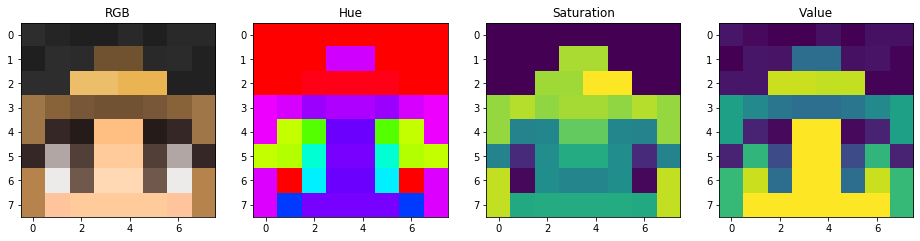

In [6]:
# analyze channels of the skin
hsv = rgb2hsv(face[:, :, :-1])
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 8))
ax[0].imshow(face)
ax[0].set_title('RGB')
ax[1].imshow(hsv[:, :, 0], cmap='hsv')
ax[1].set_title('Hue')
ax[2].imshow(hsv[:, :, 1])
ax[2].set_title('Saturation')
ax[3].imshow(hsv[:, :, 2])
ax[3].set_title('Value')

In [8]:
# compute variance of face


8172.406677246094

In [134]:
face = skin[head[0][0]:head[0][1], head[1][0]:head[1][1], :]

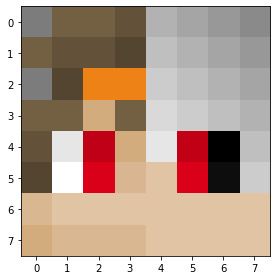

In [132]:
hsv = rgb2hsv(face)
io.imshow(face)

In [135]:
face

array([[[124, 124, 124, 255],
        [115,  95,  66, 255],
        [115,  95,  66, 255],
        [ 99,  82,  57, 255],
        [178, 178, 178, 255],
        [165, 165, 165, 255],
        [152, 152, 152, 255],
        [138, 138, 138, 255]],

       [[115,  95,  66, 255],
        [ 99,  82,  57, 255],
        [ 99,  82,  57, 255],
        [ 83,  69,  48, 255],
        [191, 191, 191, 255],
        [178, 178, 178, 255],
        [165, 165, 165, 255],
        [152, 152, 152, 255]],

       [[124, 124, 124, 255],
        [ 83,  69,  48, 255],
        [239, 130,  23, 255],
        [239, 130,  23, 255],
        [204, 204, 204, 255],
        [191, 191, 191, 255],
        [178, 178, 178, 255],
        [165, 165, 165, 255]],

       [[115,  95,  66, 255],
        [115,  95,  66, 255],
        [210, 172, 125, 255],
        [115,  95,  66, 255],
        [217, 217, 217, 255],
        [204, 204, 204, 255],
        [191, 191, 191, 255],
        [178, 178, 178, 255]],

       [[ 99,  82,  57, 255],
  

In [106]:
os.listdir('../data')

['0.png',
 '1.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '2.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '3.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '4.png',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '5.png',
 '50.png',
 '51.png',
 '52.png',
 '53.png',
 '54.png',
 '55.png',
 '56.png',
 '57.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 'steve.png',
 'template.png',
 'tree.png']

### Tag Analysis

In [68]:
# create dictionary of English words (~500k words)
words_fp = os.path.join('..', 'words_dictionary.json')
with open(words_fp) as f:
    words_dict = json.load(f)
words = []
for w in words_dict.keys():
    words.append(w.lower())

In [3]:
# read tag data
fp = os.path.join('..', 'tags.txt')
with open(fp) as f:
    tags_dict = json.load(f)

# compile into raw list
tags = []
for key, item in tags_dict.items():
    if len(item) > 0:
        tags += item
        
# remove duplicates and non words (127 after processing)
# filtered_tags = []
# i = 0
# for i in range(len(tags)-1):
#     if tags[i] not in tags[i+1:] and tags[i].lower() in words:
#         filtered_tags.append(tags[i].lower())
        
# get counts of each tag
tag_counts_full = {
    'tag': []
    , 'cnt': []
}
for t1 in tags:
    if t1 in tag_counts_full['tag']:
        continue
    cnt = 0
    for t2 in tags:
        if t1.lower() == t2.lower():
            cnt += 1
    tag_counts_full['tag'].append(t1)
    tag_counts_full['cnt'].append(cnt)

In [4]:
tags_df = pd.DataFrame(tag_counts_full)
tags_df = tags_df.sort_values(by='cnt', ascending=False).reset_index(drop=True)
tags_df.head()

,tag,cnt
0,girl,554
1,cute,498
2,blue,299
3,aesthetic,247
4,pink,233


In [9]:
plt.style.use('ggplot')

Text(0, 0.5, 'Count')

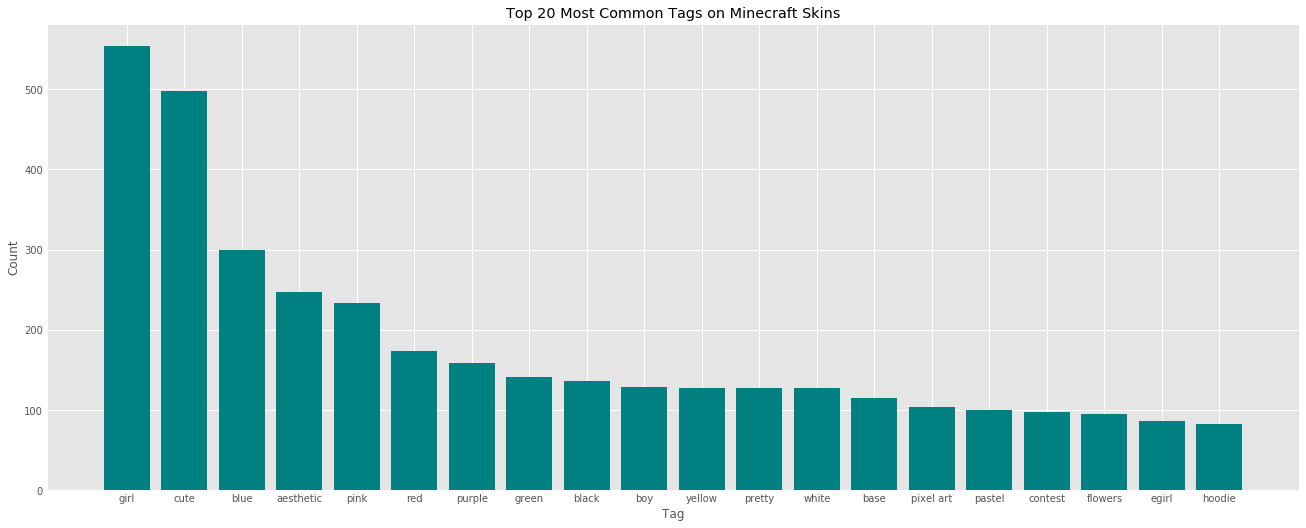

In [445]:
# create bar charts of top 20 tags
plt.figure(figsize=(20,8))
plt.bar(tags_df.iloc[:20, 0], tags_df.iloc[:20, 1], color='teal')
plt.title('Top 20 Most Common Tags on Minecraft Skins')
plt.xlabel('Tag')
plt.ylabel('Count')
#plt.savefig('top-20-tags-barchart.png')

In [5]:
single_tags = {
    'img_num': [],
    'popular_tag': []
}
for fname, tags in tags_dict.items():
    if len(tags) == 0:
        single_tags['img_num'].append(fname)
        single_tags['popular_tag'].append('no_tags')
        continue
      
    # find most popular tag and use that
    max_tag = tags[0]
    max_val = tags_df[tags_df['tag'] == max_tag]['cnt'].values[0]
    for t in tags:
        val = tags_df[tags_df['tag'] == t]['cnt'].values[0] 
        if val > max_val:
            max_tag = t
            max_val = val
    
    # update using the best tag
    single_tags['img_num'].append(fname)
    single_tags['popular_tag'].append(max_tag)

In [6]:
# create df using single tag
skins_single_tag = pd.DataFrame(single_tags)
skins_single_tag.head()

,img_num,popular_tag
0,0,girl
1,1,pokemon
2,2,girl
3,3,removetoxicity
4,4,girl


In [449]:
# assign each skin to one of the popular classes
top_classes = list(tags_df.loc[:4, 'tag'].values)
def get_class(x):
    if x in top_classes or x == 'no_tags':
        return x
    return 'other'
skins_single_tag['class'] = skins_single_tag['popular_tag'].apply(get_class)
skins_single_tag.head()

,img_num,popular_tag,class
0,0,girl,girl
1,1,pokemon,other
2,2,girl,girl
3,3,removetoxicity,other
4,4,girl,girl


In [127]:
skins_single_tag['img_num']

0          0
1          1
2          2
3          3
4          4
        ... 
2895    2895
2896    2896
2897    2897
2898    2898
2899    2899
Name: img_num, Length: 2900, dtype: object

In [450]:
skins_single_tag.shape

(2825, 3)

(64, 64, 3)


Text(0.5, 1.0, 'Fake Skin')

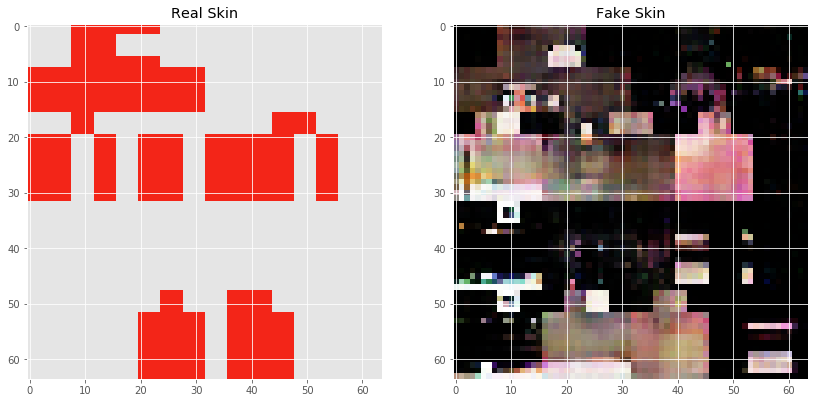

In [179]:
# use skin to upload on Minecraft model
fake_path = 'C:\\Users\\Nicho\\Desktop\\MineSkins\\notebooks\\fake_7.png'
real_path = './template.png'
real_skin = io.imread(real_path)
fake_skin = io.imread(fake_path)[:, :, :3]

print(fake_skin.shape)
fig, ax = plt.subplots(1, 2, figsize=(14, 10))
ax[0].imshow(real_skin)
ax[0].set_title('Real Skin')
ax[1].imshow(fake_skin)
ax[1].set_title('Fake Skin')

In [180]:
#masked_skin = np.zeros((fake_skin.shape[0], fake_skin.shape[1], 4))
masked_skin = []
row = []
for r in range(fake_skin.shape[0]):
    row = []
    for c in range(fake_skin.shape[1]):
        row.append(np.append(fake_skin[r][c], real_skin[r][c][3]))
    masked_skin.append(row)
masked_skin = np.array(masked_skin)

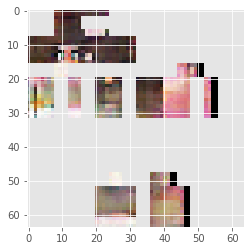

In [181]:
plt.imshow(masked_skin)

In [182]:
#masked_skin.shape
io.imsave('fake_1_no_top.png', masked_skin)

In [59]:
masked_skin[0][35:60]

array([[  1,   1,   0,   0],
       [  2,   8,   3,   0],
       [  1,   3,   1,   0],
       [  4,   9,   3,   0],
       [  6,  18,   3,   0],
       [  8,  40,   9, 255],
       [  8,  28,   8, 255],
       [  3,   9,   5, 255],
       [  3,   3,   2, 255],
       [  1,   4,   2, 255],
       [  1,   3,   2, 255],
       [  2,   4,   2, 255],
       [  8,  13,   4, 255],
       [  5,  18,   6, 255],
       [  4,   9,   6, 255],
       [  5,  11,   5, 255],
       [  1,   1,   1, 255],
       [  2,   4,   2, 255],
       [  3,   4,   2, 255],
       [  3,   5,   3, 255],
       [ 36,  46,  15, 255],
       [ 67, 108,  40,   0],
       [ 11,  23,  10,   0],
       [ 13,  33,  18,   0],
       [  7,   6,   4,   0]], dtype=uint8)

### Find images that contain a certain tag

In [35]:
tag = 'cute'
img_names = [x[0] for x in list(tags_dict.items()) if tag in x[1]]

for i in img_names:
    shutil.copy('../data/' + str(i) + '.png', 'C:\\Users\\Nicho\\Desktop\\examples\\dcgan\\data\\imgs')

In [16]:
list(tags_dict.items())[]

[('1', []),
 ('2', ['aesthetic', 'quote', 'positive', 'gradient']),
 ('3', ['27nschuler', 'storybookcreates', 'sheep']),
 ('4', []),
 ('5', ['baby pink']),
 ('6', ['donald', 'trump', 'mask']),
 ('7', ['hogwarts ravenclaw']),
 ('8', ['orange', 'pixel art']),
 ('9', []),
 ('10', ['lol']),
 ('11',
  ['cherry blossom',
   'neon',
   'ombre',
   'black',
   'hoodie',
   'tall shoes',
   'cute',
   'girl',
   'red eyes']),
 ('12', ['girl', 'brown hair', 'hoodie', 'red', 'casual']),
 ('13', ['ladevils100', 'cute', 'girl', 'idk']),
 ('14',
  ['overalls',
   'blue',
   'orange',
   'shirt',
   'shoes',
   'ribbons',
   'braid',
   'red hair',
   'cute',
   'girl']),
 ('15',
  ['sky',
   'clouds',
   'hoodie',
   'blue',
   'cat',
   'cat ears',
   'cat socks',
   'bird',
   'brinakeet1contest']),
 ('16', ['firstpost']),
 ('17', ['xxbunbunxx bunbasesx']),
 ('18',
  ['unsweet',
   'girl',
   'aesthetic',
   'ayeii',
   'black',
   'purple',
   'white',
   'emo']),
 ('19', ['green', 'sweatpants', 

In [17]:
from PIL import Image

In [34]:
# analyze sample produced from DCGAN
fake_sample = io.imread('../out/samples/fake_samples_epoch_142.png')
fake_sample.shape

(530, 530, 3)

In [39]:
#io.imsave('new_01.png', fake_sample[0:64,0:64,:])
downloaded = io.imread('./downloaded_0.png')
downloaded.shape

(64, 64, 4)

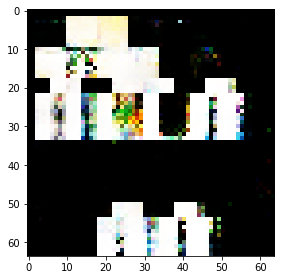

In [36]:
io.imshow(fake_sample[0:64,0:64,:])

In [ ]:
for x 

In [5]:
filtered_imgs = []
i = 0
for key, item in tags_dict.items():
    for t in filtered_tags:
        if t in item:
            filtered_imgs.append(str(int(key)-1))
            break

In [6]:
data = []
for i in filtered_imgs:
    data.append(io.imread('../data/'+i+'.png').flatten().reshape(1, -1))
data = np.array(data)

### Image Clustering

In [1]:
import umap
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
from keras import backend as K
K.set_image_data_format('channels_first')

In [4]:
model = VGG16(weights='imagenet', include_top=False)

In [3]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

In [59]:
np.array([1,2]) + np.array([2])

array([3, 4])

In [7]:
# build a few feature vectors
N = 5
data = np.array([])
for i in range(9):
    image = load_img('../data/'+str(i)+'.png', target_size=(224,224))
    image = img_to_array(image).reshape((1, 3, 224, 224))
    image = preprocess_input(image)
    vgg16_feature_vector = np.array(model.predict(image)).flatten().reshape(1, -1)
    data = np.append(data, vgg16_feature_vector)
data = data.reshape(9, -1)

# reduce dimensions
reducer = umap.UMAP()
reducer.fit(data)
embedding = reducer.transform(data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

C:\Users\Nicho\anaconda3\lib\site-packages\umap\umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


(9, 2)

In [9]:
[x for x in data]

[array([0.        , 0.        , 0.        , ..., 7.38333416, 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.])]

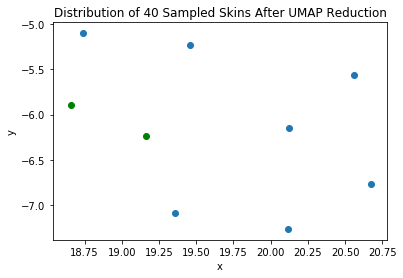

In [32]:
# plot
plt.scatter([x[0] for x in embedding[:-2]], [x[1] for x in embedding[:-2]])
plt.title('Distribution of 40 Sampled Skins After UMAP Reduction')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(embedding[-1][0], embedding[-1][1], c='green')
plt.savefig('reduced-data.png')
plt.scatter(embedding[-2][0], embedding[-2][1], c='green')

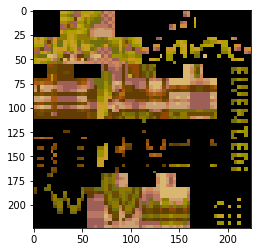

In [44]:
image = load_img('../data/1.png', target_size=(224,224))
plt.imshow(image)

In [45]:
image = img_to_array(image)
image.shape

(3, 224, 224)

In [46]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [64]:
data = preprocess_input(data)

IndexError: too many indices for array

In [48]:
vgg16_feature = model.predict(image)
vgg16_feature.shape

(1, 512, 7, 7)

In [49]:
vgg16_feature_np = np.array(vgg16_feature)
vgg16_feature_np.shape

(1, 512, 7, 7)

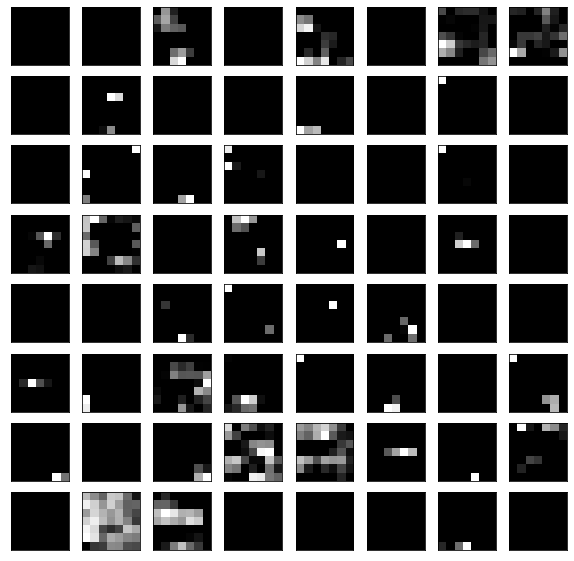

In [50]:
plt.figure(figsize=(10,10))
plt.title('First 64 Feature maps (7 x 7) For Image', fontsize=16);
# plot 64 of the maps on an 8x8 square. (NOTE we have 512 total)
xcount = 8
ycount = 8
ix = 1
for _ in range(xcount):
    for _ in range(ycount):
        # specify subplot and turn of axis
        ax = plt.subplot(xcount, ycount, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(vgg16_feature[0, ix-1, :, :], cmap='gray')
        ix += 1

In [54]:
vgg16_feature_vector = vgg16_feature_np.flatten().reshape(1, -1)
vgg16_feature_vector.shape

(1, 25088)

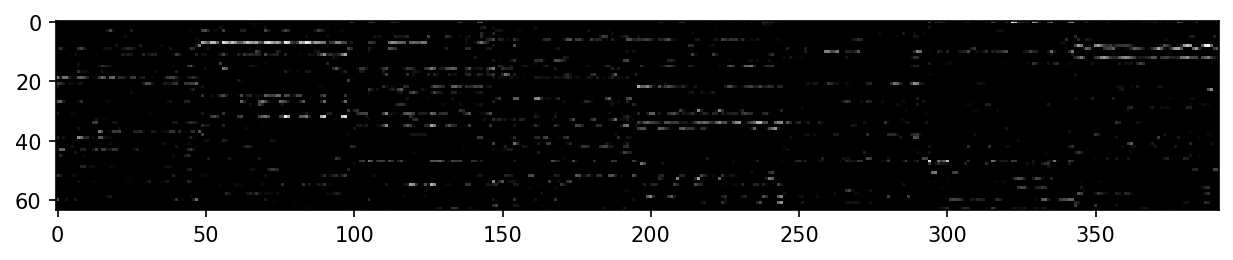

In [52]:
plt.figure(figsize=(10, 4), dpi=150)
plt.imshow(vgg16_feature_vector.reshape((64, 392)), cmap='gray')

In [71]:
reducer = umap.UMAP(random_state=42)
reducer.fit(data)

C:\Users\Nicho\anaconda3\lib\site-packages\umap\umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [73]:
embedding = reducer.transform(data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(5, 2)

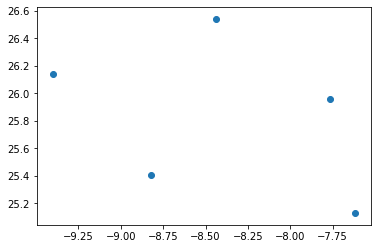

In [77]:
plt.scatter([x[0] for x in embedding], [x[1] for x in embedding])

In [6]:
from PIL import Image

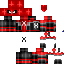

In [14]:
path = 'C:\\Users\\Nicho\\Desktop\\examples\\dcgan\\data\\imgs\\'
Image.open(path+'0.png').convert('RGBA')

In [7]:
variance = []
hue = []
for i in range(len(os.listdir('../data'))):
    img = io.imread('../data/'+str(i)+'.png')
    hsv = rgb2hsv(img[:, :, :-1])
    mean_hue = np.mean(hsv[:, :, 0])
    #mean_var = np.var(io.imread('../data/'+str(i)+'.png'))/64
    hue.append(mean_hue)
#     if mean_var > 125 and mean_var < 180:
#         print(i)

Text(0.5, 0, 'Mean Hue')

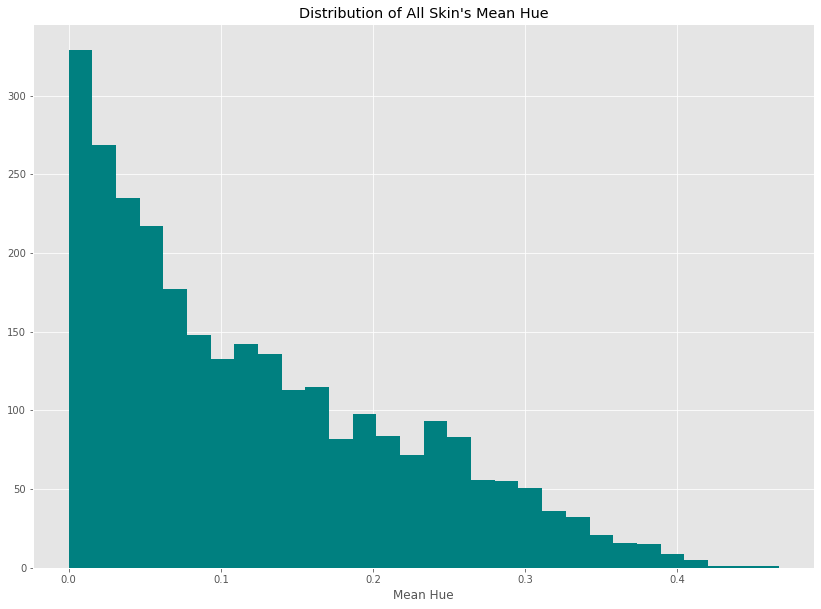

In [10]:
plt.figure(figsize=(14, 10))
plt.hist(hue, bins=30, color='teal', density=False)
plt.title('Distribution of All Skin\'s Mean Hue')
plt.xlabel('Mean Hue')
#plt.savefig('hue-histogram.png')

In [141]:
x = {'0': 'zero', '1': 'one', '2': 'two'}
del x['0']

In [142]:
x

{'1': 'one', '2': 'two'}

### Convert Unwrapped Skin Into Face and Torso For Plotting

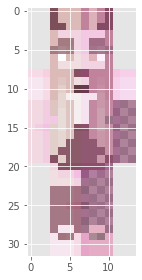

In [165]:
template = io.imread('./front-view-template.png')
spacer = template[:8, 20:23, :]
spacer_big = template[:12, 20:23, :]
#io.imshow(np.vstack((np.hstack((np.hstack((spacer, head)), spacer)), left_arm)))
left = np.vstack((np.vstack((spacer, right_arm)), spacer_big))
middle = np.vstack((np.vstack((head, torso)), np.hstack((right_leg, left_leg))))
right = np.vstack((np.vstack((spacer, left_arm)), spacer_big))
io.imshow(np.hstack((np.hstack((left, middle)), right)))
#io.imshow(template)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


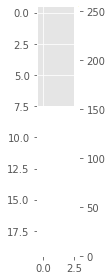

In [143]:
img = io.imread('../data/50.png')
head = img[8:16,8:16,:]
torso = img[20:32, 20:28,:]
left_leg = img[52:, 20:24, :]
right_leg = img[20:32, 4:8, :]
left_arm = img[52:, 36:39, :]
right_arm = img[20:32, 44:47, :]
#io.imshow(np.hstack((torso, left_arm)))
io.imshow(np.vstack((np.zeros((8, 3, 4)), left_arm)))

In [170]:
def save_preview():
    """
    Purpose: For each skin saved in the data directory, parse out the front facing view (face, torso, arms, and legs) and save
    as a new PNG file.
    Params: None
    Returns: None
    """
    if os.path.exists('../data_spiderman_previews'):
        os.rename('../data_spiderman_previews', '../data_spiderman_previews_del')
        shutil.rmtree('../data_spiderman_previews_del')
    os.mkdir('../data_spiderman_previews')

    # create spacers
    template = io.imread('./front-view-template.png')
    spacer = template[:8, 20:23, :]
    spacer_big = template[:12, 20:23, :]
    
    for i in range(len(os.listdir('../data_spiderman'))):
        read_path = '../data_spiderman/'
        write_path = '../data_spiderman_previews/'
        img = io.imread(read_path+str(i)+'.png')
        
        # parse out body parts
        head = img[8:16,8:16,:]
        torso = img[20:32, 20:28,:]
        left_leg = img[52:, 20:24, :]
        right_leg = img[20:32, 4:8, :]
        left_arm = img[52:, 36:39, :]
        right_arm = img[20:32, 44:47, :]
        
        # creat front view and save
        left = np.vstack((np.vstack((spacer, right_arm)), spacer_big))
        middle = np.vstack((np.vstack((head, torso)), np.hstack((right_leg, left_leg))))
        right = np.vstack((np.vstack((spacer, left_arm)), spacer_big))
        full = np.hstack((np.hstack((left, middle)), right))
        io.imsave(write_path+str(i)+'-preview.png', full)

In [171]:
save_preview()

C:\Users\Nicho\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: ../data_spiderman_previews/2-preview.png is a low contrast image
C:\Users\Nicho\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: ../data_spiderman_previews/12-preview.png is a low contrast image
C:\Users\Nicho\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: ../data_spiderman_previews/21-preview.png is a low contrast image
C:\Users\Nicho\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: ../data_spiderman_previews/35-preview.png is a low contrast image
C:\Users\Nicho\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: ../data_spiderman_previews/49-preview.png is a low contrast image
C:\Users\Nicho\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: ../data_spiderman_previews/52-preview.png is a low contrast image
C:\Users\Nicho\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: ../data_spiderman_previews/74-p